c:\Users\User\anaconda3\envs\DL\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\User\AppData\Local\Temp\ipykernel_11800\2742424373.py:33: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32).unsqueeze(1)# 返回張量
[I 2024-12-25 14:08:07,040] A new study created in memory with name: no-name-8a3b2160-df20-421e-831e-ae75a2f41332



=== Processing ./BatteryData/Cell1_data.csv ===

=== Processing ./BatteryData/Cell2_data.csv ===

=== Processing ./BatteryData/Cell3_data.csv ===

=== Processing ./BatteryData/Cell4_data.csv ===

=== Processing ./BatteryData/Cell5_data.csv ===

=== Processing ./BatteryData/Cell6_data.csv ===

=== Processing ./BatteryData/Cell7_data.csv ===

=== Processing ./BatteryData/Cell8_data.csv ===

=== Processing ./BatteryData/Cell9_data.csv ===

=== Processing ./BatteryData/Cell10_data.csv ===

=== Processing ./BatteryData/Cell11_data.csv ===

=== Processing ./BatteryData/Cell12_data.csv ===

=== Processing ./BatteryData/Cell13_data.csv ===

=== Processing ./BatteryData/Cell14_data.csv ===

=== Processing ./BatteryData/Cell15_data.csv ===

=== Processing ./BatteryData/Cell16_data.csv ===


C:\Users\User\AppData\Local\Temp\ipykernel_11800\2742424373.py:109: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-2) # 學習率
[I 2024-12-25 14:09:09,906] Trial 0 finished with value: 0.009303999161347748 and parameters: {'hidden_size': 256, 'num_layers': 2, 'dropout': 0.17074736106431299, 'lr': 3.1483557263509165e-05, 'bidirectional': True, 'batch_size': 256}. Best is trial 0 with value: 0.009303999161347748.
C:\Users\User\AppData\Local\Temp\ipykernel_11800\2742424373.py:109: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-2) # 學習率
[I 2024-12-25 14:16:34,327] Trial 1 finished with value


Best Parameters: {'hidden_size': 64, 'num_layers': 1, 'dropout': 0.11012398202662516, 'lr': 0.0037096950692847856, 'bidirectional': True, 'batch_size': 512}
Epoch 1: Train Loss: 11.3127, Validation Loss: 0.9238
Epoch 2: Train Loss: 9.6102, Validation Loss: 0.7845
Epoch 3: Train Loss: 8.1925, Validation Loss: 0.6760
Epoch 4: Train Loss: 7.3246, Validation Loss: 0.5899
Epoch 5: Train Loss: 6.6144, Validation Loss: 0.5160
Epoch 6: Train Loss: 5.7701, Validation Loss: 0.4487
Epoch 7: Train Loss: 5.2562, Validation Loss: 0.3864
Epoch 8: Train Loss: 4.6470, Validation Loss: 0.3307
Epoch 9: Train Loss: 4.2008, Validation Loss: 0.2821
Epoch 10: Train Loss: 3.6623, Validation Loss: 0.2398
Epoch 11: Train Loss: 3.4360, Validation Loss: 0.2023
Epoch 12: Train Loss: 3.1691, Validation Loss: 0.1693
Epoch 13: Train Loss: 2.8576, Validation Loss: 0.1416
Epoch 14: Train Loss: 2.4830, Validation Loss: 0.1184
Epoch 15: Train Loss: 2.3655, Validation Loss: 0.0998
Epoch 16: Train Loss: 2.1422, Validation

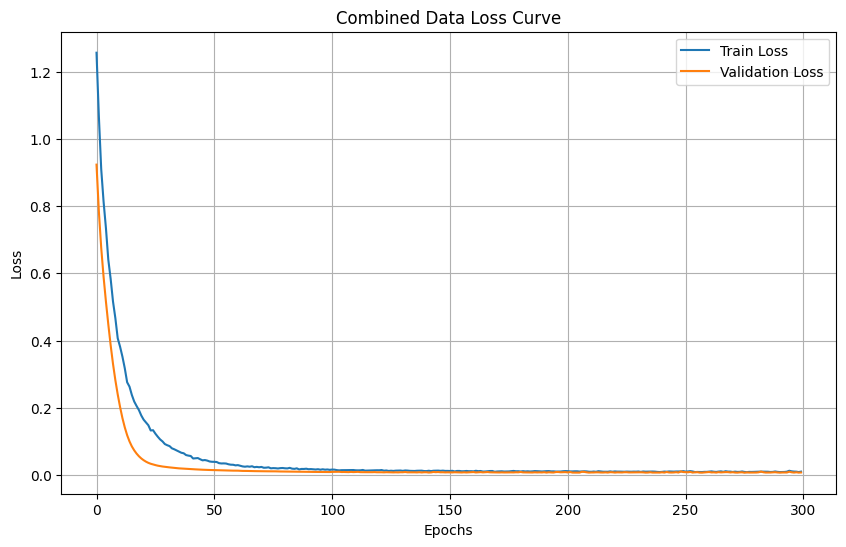

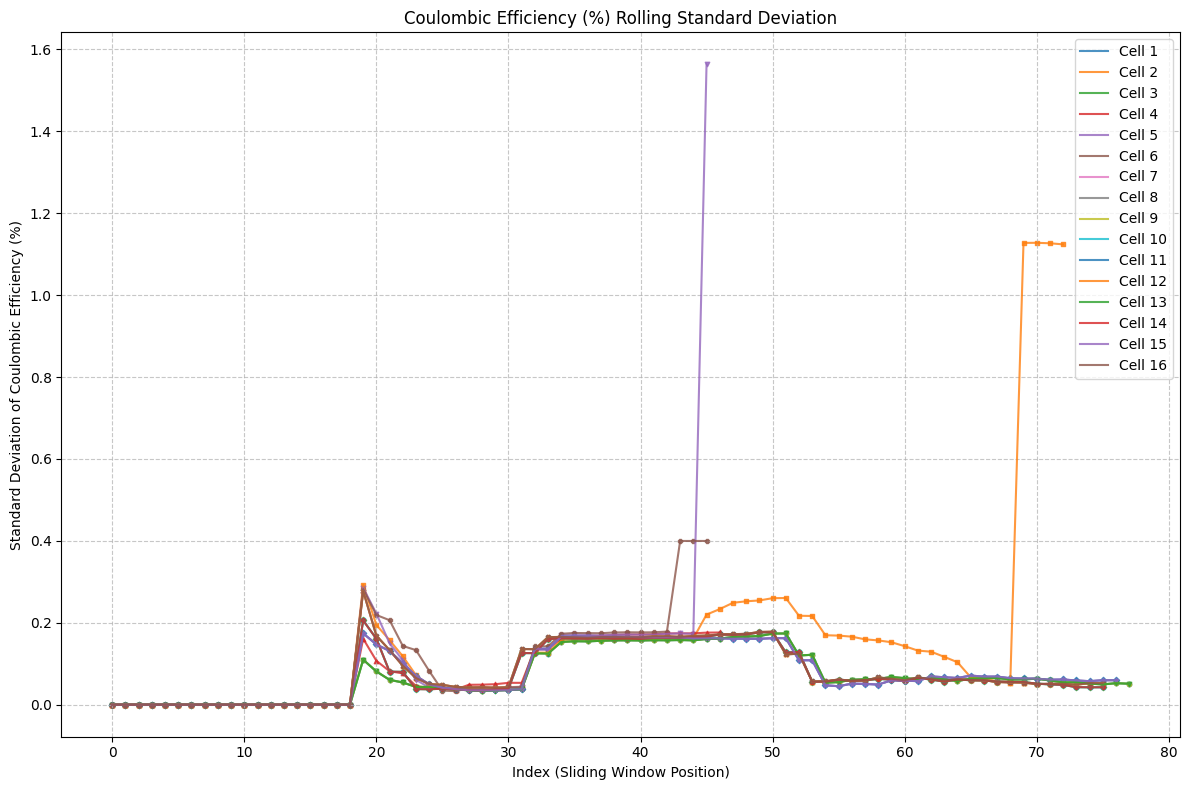

FileNotFoundError: [Errno 2] No such file or directory: './BatteryData/Cell_TEST.csv'

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from torch.utils.data import DataLoader, TensorDataset
import optuna
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error

# ====================
# 1. 數據增強與特徵處理
# ====================
# 將數據轉換為序列，方便 LSTM 模型進行時間序列預測
def create_sequences(data, sequence_length):
    """
    創建序列樣本和目標值，用於時間序列模型。
    
    參數:
        - data: 輸入的數據矩陣，最後一列為目標值。
        - sequence_length: 序列的長度。

    返回:
        - X: 時間序列數據張量，形狀為 [樣本數, 序列長度, 特徵數]
        - y: 對應的目標值張量，形狀為 [樣本數, 1]
    """
    X, y = [], [] # 初始化輸入序列和目標值列表
    for i in range(len(data) - sequence_length + 1): # 遍歷每個樣本的起始位置
        X.append(data[i:i + sequence_length, :-1]) # 提取序列部分作為輸入
        y.append(data[i + sequence_length - 1, -1]) # 提取目標值部分
    return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32).unsqueeze(1)# 返回張量

def add_noise(data, noise_level=0.002): # 添加隨機高斯噪聲以模擬測量過程中的誤差。

    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise

def jitter_data(data, jitter_factor=0.001): # 添加輕微抖動，模擬測量中的小變化。
    return data + jitter_factor * np.random.randn(*data.shape)

def feature_scaling(data, scale_range=(0.98, 1.02)): # 特徵縮放，對每列數據乘以隨機比例，增加多樣性
    scale_factors = np.random.uniform(scale_range[0], scale_range[1], data.shape[1])
    return data * scale_factors

def random_shift(data, max_shift=0.02): # 隨機平移數據值，模擬測量誤差或環境影響
    shift = np.random.uniform(-max_shift, max_shift, size=data.shape)
    return data + shift

def smooth_data(data, window=5): # 使用滑動窗口平滑數據，減少隨機波動
    return np.convolve(data, np.ones(window) / window, mode='same')

def calculate_rolling_std(data, window_size=20): # 計算數據的滑動標準差，用於提取變化特徵
    rolling_std = [np.std(data[i:i + window_size]) for i in range(len(data) - window_size + 1)]
    return np.concatenate((np.zeros(window_size - 1), rolling_std))

def rolling_mean_feature(data, window_size=5): # 計算數據的滑動平均值，用於提取趨勢特徵
    rolling_mean = [np.mean(data[i:i + window_size]) for i in range(len(data) - window_size + 1)]
    return np.concatenate((np.zeros(window_size - 1), rolling_mean))

# ====================
# 2. LSTM 模型定義
# ====================
class LSTMModel(nn.Module):
    """
        初始化 LSTM 模型。
        
        參數:
            - input_size: 輸入特徵數。
            - hidden_size: 每層的隱藏單元數。
            - num_layers: 堆疊的 LSTM 層數。
            - dropout: Dropout 比例，防止過擬合。
            - bidirectional: 是否使用雙向 LSTM。
    """
    def __init__(self, input_size, hidden_size, num_layers, dropout, bidirectional=False):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout, bidirectional=bidirectional)
        self.fc = nn.Sequential(
            nn.LayerNorm(hidden_size * (2 if bidirectional else 1)), # 標準化數據
            nn.Dropout(0.4), # 丟棄部分神經元以防止過擬合
            nn.Linear(hidden_size * (2 if bidirectional else 1), 1)  # 最終輸出
        )

    def forward(self, x):
        """
        定義前向傳播:
        1. LSTM 輸出序列。
        2. 取最後時間步的輸出。
        3. 通過全連接層獲得預測值。
        """
        out, _ = self.lstm(x) # LSTM 的輸出
        out = out[:, -1, :]  # 取最後一個時間步
        return self.fc(out) # 全連接層輸出


# ====================
# 3. Optuna 調整模型參數
# ====================
def objective(trial, X_tensor, y_tensor):
    """
    使用 Optuna 自動調參，尋找最佳模型超參數。
    trial: Optuna 試驗對象。
    X_tensor, y_tensor: 數據張量。
    """
    hidden_size = trial.suggest_int('hidden_size', 64, 512, step=64) # 隱藏層大小
    num_layers = trial.suggest_int('num_layers', 1, 5) # LSTM 層數
    dropout = trial.suggest_float('dropout', 0.1, 0.5) # Dropout概率 用於防止過擬合
    lr = trial.suggest_loguniform('lr', 1e-5, 1e-2) # 學習率
    bidirectional = trial.suggest_categorical('bidirectional', [True, False]) # 是否使用雙向 LSTM
    batch_size = trial.suggest_categorical('batch_size', [256, 512]) # 批次大小

    # 定義模型、損失函數和優化器
    model = LSTMModel(input_size=X_tensor.shape[2], hidden_size=hidden_size, num_layers=num_layers, dropout=dropout, bidirectional=bidirectional)
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-3) # 使用 Adam 優化器
    criterion = nn.MSELoss() # 均方誤差損失函數

    # 使用 5 折交叉驗證測試模型性能
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    val_losses = [] # 保存每折的驗證損失

    for train_index, val_index in kf.split(X_tensor):  # 進行交叉驗證
        X_train, X_val = X_tensor[train_index], X_tensor[val_index] # 分割數據
        y_train, y_val = y_tensor[train_index], y_tensor[val_index]

        # 創建 DataLoader
        train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=batch_size, shuffle=False)
        # 訓練模型
        for epoch in range(10): # 每折訓練 10 次
            model.train() # 設置為訓練模式
            for X_batch, y_batch in train_loader: # 遍歷每個批次數據
                optimizer.zero_grad()# 清空梯度
                loss = criterion(model(X_batch), y_batch)# 計算損失
                loss.backward()# 反向傳播
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)# 梯度裁剪，防止梯度爆炸
                optimizer.step() # 更新參數
        # 驗證階段
        model.eval()  # 設置為評估模式
        val_loss = 0
        with torch.no_grad():  # 禁用梯度計算
            for X_batch, y_batch in val_loader:
                val_loss += criterion(model(X_batch), y_batch).item()  # 累加驗證損失
        val_losses.append(val_loss / len(val_loader)) # 保存平均驗證損失

    return np.mean(val_losses)  # 返回平均驗證損失作為調參目標

# ====================
# 4. 數據處理與模型訓練
# ====================
cell_paths = [f'./BatteryData/Cell{i}_data.csv' for i in range(1, 17)]  # 定義每個 Cell 的數據路徑
all_data_list = []  # 用於保存所有數據

for cell_path in cell_paths: # 遍歷每個 Cell 的數據
    print(f"\n=== Processing {cell_path} ===")
    data = pd.read_csv(cell_path) # 讀取數據
    rolling_std = calculate_rolling_std(data['Coulombic_Efficiency (%)'].dropna().values) # 計算滑動標準差
    rolling_mean = rolling_mean_feature(data['Coulombic_Efficiency (%)'].dropna().values) # 計算滑動平均值
    data['Rolling_Std'] = rolling_std # 添加滑動標準差作為新特徵
    data['Rolling_Mean'] = rolling_mean # 添加滑動平均值作為新特徵

    # 選擇特徵進行標準化處理
    selected_features = ['Cycle', 'OCVdc_q', 'OCVch_q', 'Coulombic_Efficiency (%)', 'Rolling_Std', 'Rolling_Mean']
    scaler = StandardScaler() # 初始化標準化工具
    data_array = scaler.fit_transform(data[selected_features]) # 標準化數據
    for i in range(data_array.shape[1]): # 對每列進行平滑處理
        data_array[:, i] = smooth_data(data_array[:, i])
    all_data_list.append(data_array) # 保存處理後的數據

# 合併所有 Cell 的數據並進行數據增強
combined_data = np.vstack(all_data_list) # 合併所有數據
augmented_data = np.vstack([
    combined_data,
    add_noise(combined_data), # 添加噪聲
    jitter_data(combined_data), # 添加抖動
    feature_scaling(combined_data), # 特徵縮放
    random_shift(combined_data) # 隨機位移
])

# 創建時間序列數據
X_combined, y_combined = create_sequences(augmented_data, sequence_length=10)


# 使用 Optuna 進行模型參數調整
study_combined = optuna.create_study(direction='minimize') # 初始化調參目標為最小化
study_combined.optimize(lambda trial: objective(trial, X_combined, y_combined), n_trials=30) # 優化目標函數
best_params = study_combined.best_params # 保存最佳參數
print("\nBest Parameters:", best_params)


# 訓練模型
final_model = LSTMModel(input_size=X_combined.shape[2],
                        hidden_size=best_params['hidden_size'],
                        num_layers=best_params['num_layers'],
                        dropout=best_params['dropout'],
                        bidirectional=best_params['bidirectional']) # 使用最佳參數構建模型

optimizer = optim.Adam(final_model.parameters(), lr=best_params['lr'], weight_decay=1e-3) # 使用 Adam 優化器
criterion = nn.MSELoss() # 定義損失函數
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=best_params['lr'] * 0.5, steps_per_epoch=len(X_combined)//best_params['batch_size'], epochs=300, pct_start=0.1) # 設置學習率調整策略


# 分割數據集為訓練集和驗證集
X_train_comb, X_val_comb, y_train_comb, y_val_comb = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)
train_loader_comb = DataLoader(TensorDataset(X_train_comb, y_train_comb), batch_size=best_params['batch_size'], shuffle=True) # 構建訓練數據加載器
val_loader_comb = DataLoader(TensorDataset(X_val_comb, y_val_comb), batch_size=best_params['batch_size'], shuffle=False) # 構建驗證數據加載器


loss_history, val_loss_history = [], []  # 用於保存損失
for epoch in range(300): # 訓練 300 個迭代
    final_model.train() # 設置為訓練模式
    epoch_loss = 0
    for X_batch, y_batch in train_loader_comb: # 遍歷每個批次
        optimizer.zero_grad() # 清空梯度
        loss = criterion(final_model(X_batch), y_batch) # 計算損失
        loss.backward()# 反向傳播
        torch.nn.utils.clip_grad_norm_(final_model.parameters(), max_norm=1.0)# 梯度裁剪
        optimizer.step()# 更新參數
        epoch_loss += loss.item()


    # 計算驗證損失
    final_model.eval() # 設置為評估模式
    val_loss = sum(criterion(final_model(X_batch), y_batch).item() for X_batch, y_batch in val_loader_comb) / len(val_loader_comb)
    loss_history.append(epoch_loss / len(train_loader_comb)) # 保存訓練損失
    val_loss_history.append(val_loss) # 保存驗證損失
    scheduler.step()# 更新學習率
    print(f"Epoch {epoch+1}: Train Loss: {epoch_loss:.4f}, Validation Loss: {val_loss:.4f}")

# ====================
# 5. 可視化結果
# ====================
plt.figure(figsize=(10, 6))
plt.plot(loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.title("Combined Data Loss Curve")
plt.xlabel("Epochs") # 設置 X 軸標籤，表示訓練的迭代次數
plt.ylabel("Loss") # 設置 Y 軸標籤，表示損失值
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(12, 8))  # 創建圖像窗口
markers = ['o', 's', 'D', '^', 'v', 'P', '*', 'X']  # 每個電池數據的標記樣式
for idx, cell_path in enumerate(cell_paths):
    # 讀取數據並計算滾動標準差
    data = pd.read_csv(cell_path)
    efficiency_values = data['Coulombic_Efficiency (%)'].dropna().values  # 提取有效數據
    rolling_std = calculate_rolling_std(efficiency_values)  # 計算滾動標準差
    x_range = range(len(rolling_std))  # X 軸範圍

    # 繪製滾動標準差曲線
    plt.plot(x_range, rolling_std, label=f"Cell {idx+1}", linestyle='-', linewidth=1.5, alpha=0.8)
    
    # 新增數據點 (每個位置都標記)
    plt.scatter(x_range, rolling_std, s=10, marker=markers[idx % len(markers)], alpha=0.8)

# 設置圖表屬性
plt.title("Coulombic Efficiency (%) Rolling Standard Deviation")
plt.xlabel("Index (Sliding Window Position)")
plt.ylabel("Standard Deviation of Coulombic Efficiency (%)")
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




In [4]:
torch.save(final_model.state_dict(), "trained_1224LSTM_model.pth")
print("Model saved as trained_LSTM_model.pth")
torch.save(final_model, "complete_trained_1224LSTM_model.pth")

Model saved as trained_LSTM_model.pth


In [5]:
# 初始化模型結構
loaded_model = LSTMModel(input_size=X_combined.shape[2],
                         hidden_size=best_params['hidden_size'],
                         num_layers=best_params['num_layers'],
                         dropout=best_params['dropout'],
                         bidirectional=best_params['bidirectional'])
# 加載權重
loaded_model.load_state_dict(torch.load("trained_1224LSTM_model.pth"))
loaded_model.eval()  # 切換到評估模式
print("Model loaded and ready for evaluation.")
# 或加載完整模型
loaded_model = torch.load("complete_trained_1224LSTM_model.pth")
loaded_model.eval()

Model loaded and ready for evaluation.


c:\Users\User\anaconda3\envs\DL\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.11012398202662516 and num_layers=1
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_11800\1340515302.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_saf

LSTMModel(
  (lstm): LSTM(5, 64, batch_first=True, dropout=0.11012398202662516, bidirectional=True)
  (fc): Sequential(
    (0): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    (1): Dropout(p=0.4, inplace=False)
    (2): Linear(in_features=128, out_features=1, bias=True)
  )
)

C:\Users\User\AppData\Local\Temp\ipykernel_11800\2409527919.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  trained_model.load_state_dict(torch.load("trained_1224LSTM_m


=== 測試 ./BatteryData/Cell1_data.csv ===

=== 測試 ./BatteryData/Cell2_data.csv ===

=== 測試 ./BatteryData/Cell3_data.csv ===

=== 測試 ./BatteryData/Cell4_data.csv ===

=== 測試 ./BatteryData/Cell5_data.csv ===

=== 測試 ./BatteryData/Cell6_data.csv ===

=== 測試 ./BatteryData/Cell7_data.csv ===

=== 測試 ./BatteryData/Cell8_data.csv ===

=== 測試 ./BatteryData/Cell9_data.csv ===

=== 測試 ./BatteryData/Cell10_data.csv ===

=== 測試 ./BatteryData/Cell11_data.csv ===

=== 測試 ./BatteryData/Cell12_data.csv ===

=== 測試 ./BatteryData/Cell13_data.csv ===

=== 測試 ./BatteryData/Cell14_data.csv ===

=== 測試 ./BatteryData/Cell15_data.csv ===

=== 測試 ./BatteryData/Cell16_data.csv ===


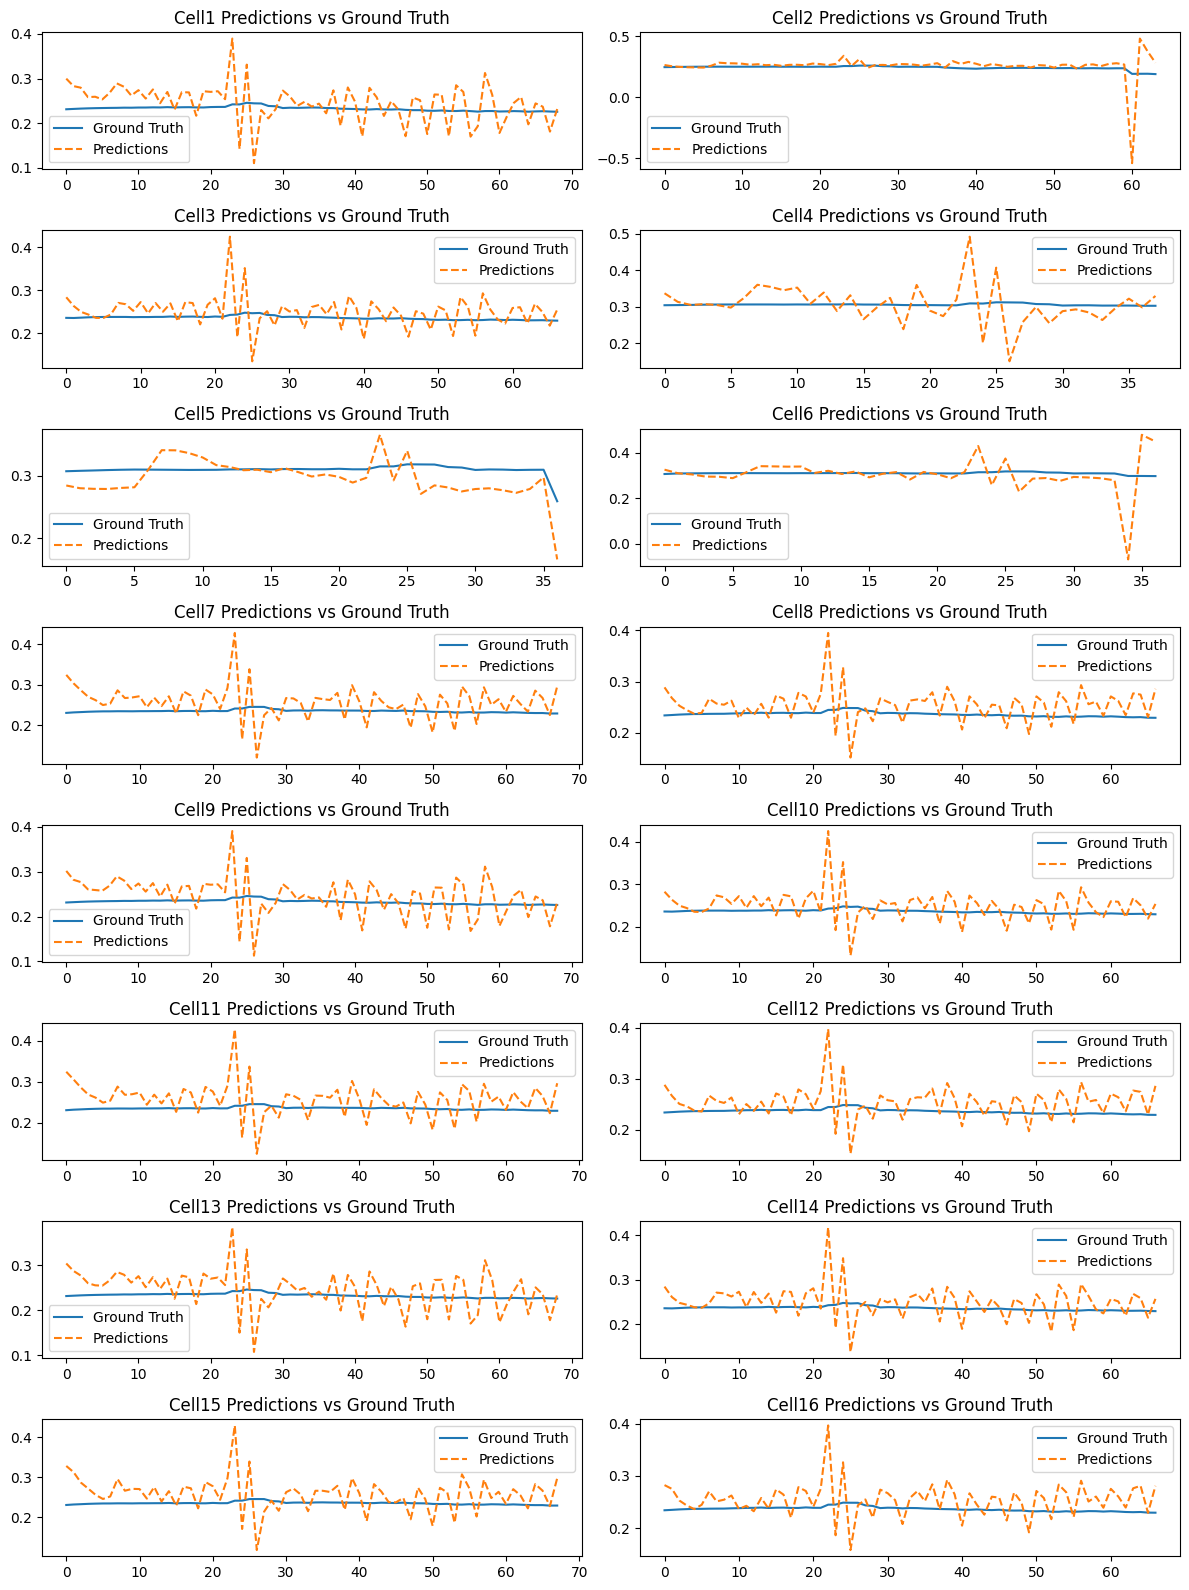

In [6]:
import matplotlib.pyplot as plt

# 初始化已保存的模型架構
trained_model = LSTMModel(input_size=X_combined.shape[2],
                          hidden_size=best_params['hidden_size'],
                          num_layers=best_params['num_layers'],
                          dropout=best_params['dropout'],
                          bidirectional=best_params['bidirectional'])

# 加載訓練好的模型權重
trained_model.load_state_dict(torch.load("trained_1224LSTM_model.pth"))
trained_model.eval()  # 切換到評估模式 確保不使用 Dropout 等訓練專用功能

# 用來儲存各個 Cell 的預測結果
predictions_dict = {} #存儲每個 Cell 的模型預測結果。
ground_truth_dict = {} #存儲每個 Cell 的真實目標值

#遍歷所有電池數據文件進行預測
for i, cell_path in enumerate(cell_paths):                                                                                                                                          
    print(f"\n=== 測試 {cell_path} ===")
    
    # 數據處理
    data = pd.read_csv(cell_path)
    rolling_std = calculate_rolling_std(data['Coulombic_Efficiency (%)'].dropna().values)  #計算 Coulombic Efficiency 的滑動標準差，捕捉數據波動情況。
    rolling_mean = rolling_mean_feature(data['Coulombic_Efficiency (%)'].dropna().values)  #計算 Coulombic Efficiency 的滑動平均值，平滑數據變化趨勢。
    data['Rolling_Std'] = rolling_std #滑動標準差
    data['Rolling_Mean'] = rolling_mean #滑動平均

    selected_features = ['Cycle', 'OCVdc_q', 'OCVch_q', 'Coulombic_Efficiency (%)', 'Rolling_Std', 'Rolling_Mean'] #從數據中選取的特徵列。
    scaler = StandardScaler() #標準化數據，使所有特徵值具有相同的均值和方差。
    data_array = scaler.fit_transform(data[selected_features])
    X_cell, y_cell = create_sequences(data_array, sequence_length=10) #將數據轉換為模型可以處理的序列形式，設置序列長度為 10。
    
    # DataLoader 準備
    test_loader = DataLoader(TensorDataset(X_cell, y_cell), batch_size=64, shuffle=False)
    """
    TensorDataset: 將數據轉換為 PyTorch 張量數據集。
    DataLoader: 方便地按批次讀取數據進行預測。
    batch_size=64: 每批數據的大小。
    shuffle=False: 不打亂數據順序，保持順序進行預測。
    """

    # 預測
    predictions, ground_truth = [], []
    with torch.no_grad(): # 在預測時禁用梯度計算，提高效率
        for X_batch, y_batch in test_loader:
            preds = trained_model(X_batch).squeeze().numpy()
            predictions.extend(preds)
            ground_truth.extend(y_batch.squeeze().numpy())
    """
    torch.no_grad(): 禁止計算梯度，節省內存和計算時間。
    trained_model(X_batch): 使用模型對數據進行預測。
    squeeze(): 去除多餘的維度，使數據變得扁平。
    extend: 將預測結果和真實值保存到列表中。
    """

    # 保存結果
    predictions_dict[f'Cell{i+1}'] = predictions
    ground_truth_dict[f'Cell{i+1}'] = ground_truth

# ==================== 視覺化每個 Cell 的結果 ====================
plt.figure(figsize=(12, 16))
for i, (cell, preds) in enumerate(predictions_dict.items()):
    plt.subplot(8, 2, i+1)  # 4x2 子圖
    plt.plot(ground_truth_dict[cell], label='Ground Truth') # 真實值
    plt.plot(preds, label='Predictions', linestyle='--') # 模型預測值
    plt.title(f'{cell} Predictions vs Ground Truth') # 子圖標題
    plt.legend()
    plt.tight_layout()

plt.show()

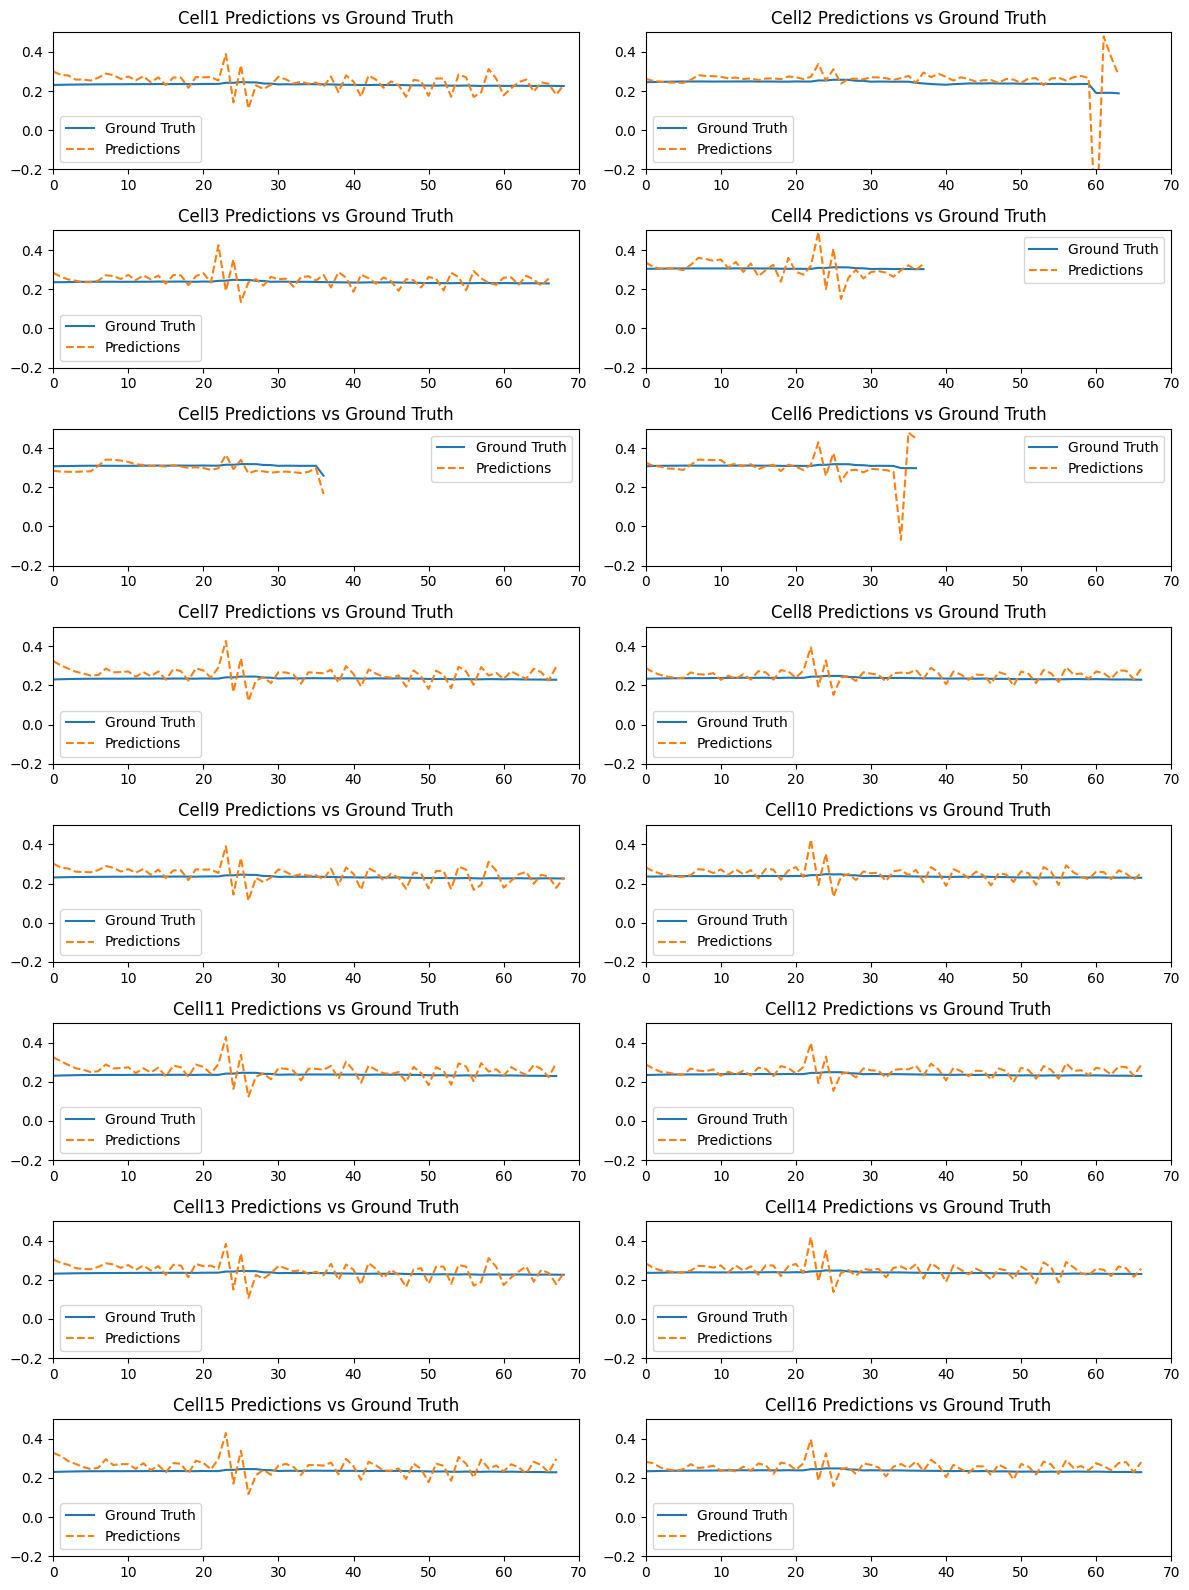

In [7]:
# ==================== 視覺化每個 Cell 的結果 ====================
plt.figure(figsize=(12, 16))

# 統一 X 軸和 Y 軸的範圍
x_min, x_max = 0, 70  # 統一 X 軸範圍
y_min, y_max = -0.2, 0.5  # 統一 Y 軸範圍 (根據數據調整範圍)

for i, (cell, preds) in enumerate(predictions_dict.items()):
    plt.subplot(8, 2, i+1)  # 4x2 子圖
    plt.plot(ground_truth_dict[cell], label='Ground Truth')  # 真實值
    plt.plot(preds, label='Predictions', linestyle='--')  # 模型預測值
    plt.title(f'{cell} Predictions vs Ground Truth')  # 子圖標題
    
    # 設定統一的 X 軸和 Y 軸範圍
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.legend()
    plt.tight_layout()

plt.show()

[I 2024-12-27 13:17:41,301] A new study created in memory with name: no-name-9e579eae-f436-42cc-805c-731edbe26785



=== Processing ./BatteryData/Cell1_data.csv ===

=== Processing ./BatteryData/Cell2_data.csv ===

=== Processing ./BatteryData/Cell3_data.csv ===

=== Processing ./BatteryData/Cell4_data.csv ===

=== Processing ./BatteryData/Cell5_data.csv ===

=== Processing ./BatteryData/Cell6_data.csv ===

=== Processing ./BatteryData/Cell7_data.csv ===

=== Processing ./BatteryData/Cell8_data.csv ===

=== Processing ./BatteryData/Cell9_data.csv ===

=== Processing ./BatteryData/Cell10_data.csv ===

=== Processing ./BatteryData/Cell11_data.csv ===

=== Processing ./BatteryData/Cell12_data.csv ===

=== Processing ./BatteryData/Cell13_data.csv ===

=== Processing ./BatteryData/Cell14_data.csv ===

=== Processing ./BatteryData/Cell15_data.csv ===

=== Processing ./BatteryData/Cell16_data.csv ===


C:\Users\User\AppData\Local\Temp\ipykernel_13964\354720758.py:115: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-2) # 學習率
[I 2024-12-27 13:20:16,790] Trial 0 finished with value: 0.02336566772311926 and parameters: {'hidden_size': 320, 'num_layers': 3, 'dropout': 0.21167872290806677, 'lr': 0.008872133716528376, 'bidirectional': True, 'batch_size': 256}. Best is trial 0 with value: 0.02336566772311926.
[I 2024-12-27 13:20:27,455] Trial 1 finished with value: 0.005769479313554862 and parameters: {'hidden_size': 128, 'num_layers': 2, 'dropout': 0.10322040563922204, 'lr': 0.0007754966696705997, 'bidirectional': False, 'batch_size': 512}. Best is trial 1 with value: 0.005769479313554862.
[I 2024-12-27 13:20:47,052] Trial 2 finished with value: 0.008832843499258163 and parameters: {'hidden


Best Parameters: {'hidden_size': 64, 'num_layers': 1, 'dropout': 0.40860073847682743, 'lr': 0.0016397730980255646, 'bidirectional': True, 'batch_size': 256}
Epoch 1: Train Loss: 12.3346, Validation Loss: 0.4268
Epoch 2: Train Loss: 10.8540, Validation Loss: 0.3866
Epoch 3: Train Loss: 10.5870, Validation Loss: 0.3524
Epoch 4: Train Loss: 9.7964, Validation Loss: 0.3206
Epoch 5: Train Loss: 9.1811, Validation Loss: 0.2908
Epoch 6: Train Loss: 8.8213, Validation Loss: 0.2644
Epoch 7: Train Loss: 8.1792, Validation Loss: 0.2411
Epoch 8: Train Loss: 7.6131, Validation Loss: 0.2196
Epoch 9: Train Loss: 7.3594, Validation Loss: 0.2004
Epoch 10: Train Loss: 6.7160, Validation Loss: 0.1824
Epoch 11: Train Loss: 6.4117, Validation Loss: 0.1663
Epoch 12: Train Loss: 6.0590, Validation Loss: 0.1516
Epoch 13: Train Loss: 6.0909, Validation Loss: 0.1384
Epoch 14: Train Loss: 5.4477, Validation Loss: 0.1265
Epoch 15: Train Loss: 5.1988, Validation Loss: 0.1154
Epoch 16: Train Loss: 4.9540, Validati

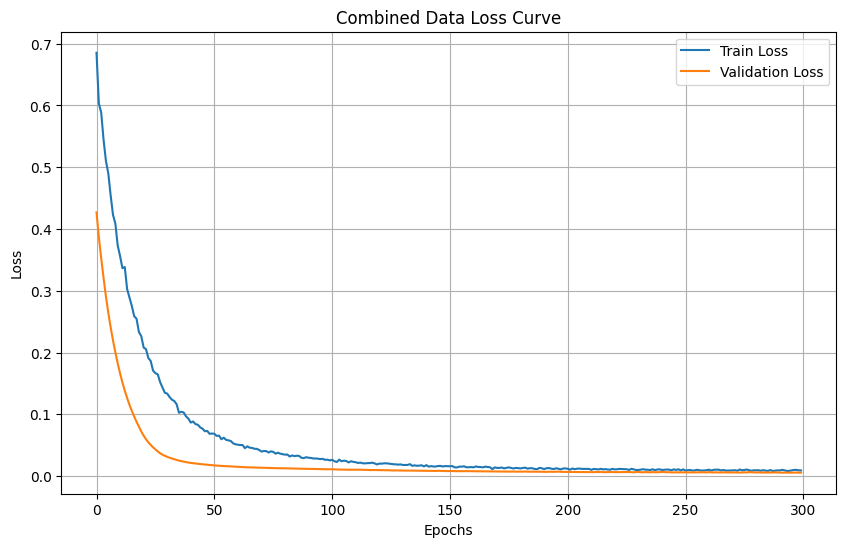

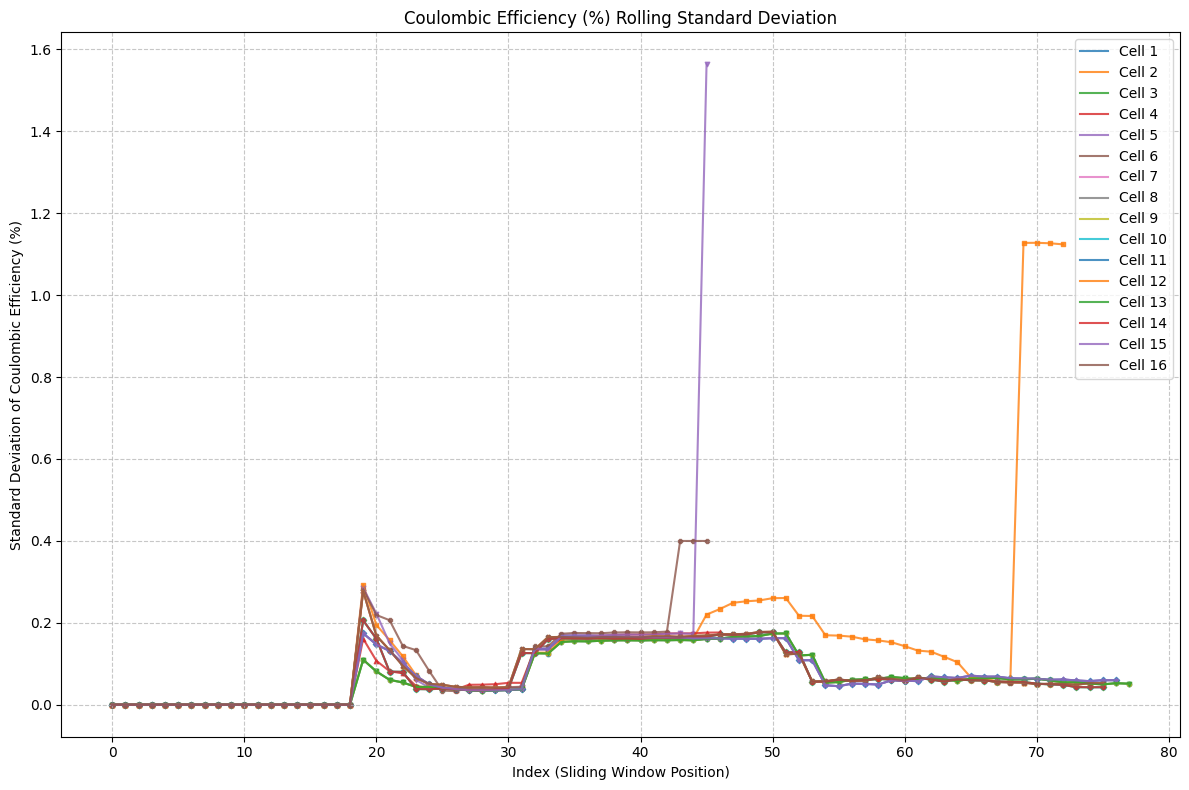

In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from torch.utils.data import DataLoader, TensorDataset
import optuna
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error

# ====================
# 1. 數據增強與特徵處理
# ====================


# 將數據轉換為序列，方便 LSTM 模型進行時間序列預測
def create_sequences(data, sequence_length):
    """
    創建序列樣本和目標值，用於時間序列模型。
    
    參數:
        - data: 輸入的數據矩陣，最後一列為目標值。
        - sequence_length: 序列的長度。

    返回:
        - X: 時間序列數據張量，形狀為 [樣本數, 序列長度, 特徵數]
        - y: 對應的目標值張量，形狀為 [樣本數, 1]
    """
    X, y = [], [] # 初始化輸入序列和目標值列表
    for i in range(len(data) - sequence_length + 1): # 遍歷每個樣本的起始位置
        X.append(data[i:i + sequence_length, :-1]) # 提取序列部分作為輸入
        y.append(data[i + sequence_length - 1, -1]) # 提取目標值部分
    return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32).unsqueeze(1)# 返回張量

def add_noise(data, noise_level=0.002): # 添加隨機高斯噪聲以模擬測量過程中的誤差。

    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise

def jitter_data(data, jitter_factor=0.001): # 添加輕微抖動，模擬測量中的小變化。
    return data + jitter_factor * np.random.randn(*data.shape)

def feature_scaling(data, scale_range=(0.98, 1.02)): # 特徵縮放，對每列數據乘以隨機比例，增加多樣性
    scale_factors = np.random.uniform(scale_range[0], scale_range[1], data.shape[1])
    return data * scale_factors

def random_shift(data, max_shift=0.02): # 隨機平移數據值，模擬測量誤差或環境影響
    shift = np.random.uniform(-max_shift, max_shift, size=data.shape)
    return data + shift

def smooth_data(data, window=5): # 使用滑動窗口平滑數據，減少隨機波動
    return np.convolve(data, np.ones(window) / window, mode='same')

def calculate_rolling_std(data, window_size=20): # 計算數據的滑動標準差，用於提取變化特徵
    rolling_std = [np.std(data[i:i + window_size]) for i in range(len(data) - window_size + 1)]
    return np.concatenate((np.zeros(window_size - 1), rolling_std))

def rolling_mean_feature(data, window_size=5): # 計算數據的滑動平均值，用於提取趨勢特徵
    rolling_mean = [np.mean(data[i:i + window_size]) for i in range(len(data) - window_size + 1)]
    return np.concatenate((np.zeros(window_size - 1), rolling_mean))

# ====================
# 2. LSTM 模型定義
# ====================


class LSTMModel(nn.Module):
    """
        初始化 LSTM 模型。
        
        參數:
            - input_size: 輸入特徵數。
            - hidden_size: 每層的隱藏單元數。
            - num_layers: 堆疊的 LSTM 層數。
            - dropout: Dropout 比例，防止過擬合。
            - bidirectional: 是否使用雙向 LSTM。
    """
    def __init__(self, input_size, hidden_size, num_layers, dropout, bidirectional=False):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout, bidirectional=bidirectional)
        self.fc = nn.Sequential(
            nn.LayerNorm(hidden_size * (2 if bidirectional else 1)), # 標準化數據
            nn.Dropout(0.4), # 丟棄部分神經元以防止過擬合
            nn.Linear(hidden_size * (2 if bidirectional else 1), 1)  # 最終輸出
        )

    def forward(self, x):
        """
        定義前向傳播:
        1. LSTM 輸出序列。
        2. 取最後時間步的輸出。
        3. 通過全連接層獲得預測值。
        """
        out, _ = self.lstm(x) # LSTM 的輸出
        out = out[:, -1, :]  # 取最後一個時間步
        return self.fc(out) # 全連接層輸出


# ====================
# 3. Optuna 調整模型參數
# ====================


def objective(trial, X_tensor, y_tensor):
    """
    使用 Optuna 自動調參，尋找最佳模型超參數。
    trial: Optuna 試驗對象。
    X_tensor, y_tensor: 數據張量。
    """
    hidden_size = trial.suggest_int('hidden_size', 64, 512, step=64) # 隱藏層大小
    num_layers = trial.suggest_int('num_layers', 1, 5) # LSTM 層數
    dropout = trial.suggest_float('dropout', 0.1, 0.5) # Dropout概率 用於防止過擬合
    lr = trial.suggest_loguniform('lr', 1e-5, 1e-2) # 學習率
    bidirectional = trial.suggest_categorical('bidirectional', [True, False]) # 是否使用雙向 LSTM
    batch_size = trial.suggest_categorical('batch_size', [256, 512]) # 批次大小

    # 定義模型、損失函數和優化器
    model = LSTMModel(input_size=X_tensor.shape[2], hidden_size=hidden_size, num_layers=num_layers, dropout=dropout, bidirectional=bidirectional)
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-3) # 使用 Adam 優化器
    criterion = nn.MSELoss() # 均方誤差損失函數

    # 使用 5 折交叉驗證測試模型性能
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    val_losses = [] # 保存每折的驗證損失

    for train_index, val_index in kf.split(X_tensor):  # 進行交叉驗證
        X_train, X_val = X_tensor[train_index], X_tensor[val_index] # 分割數據
        y_train, y_val = y_tensor[train_index], y_tensor[val_index]

        # 創建 DataLoader
        train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=batch_size, shuffle=False)
        # 訓練模型
        for epoch in range(10): # 每折訓練 10 次
            model.train() # 設置為訓練模式
            for X_batch, y_batch in train_loader: # 遍歷每個批次數據
                optimizer.zero_grad()# 清空梯度
                loss = criterion(model(X_batch), y_batch)# 計算損失
                loss.backward()# 反向傳播
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)# 梯度裁剪，防止梯度爆炸
                optimizer.step() # 更新參數
        # 驗證階段
        model.eval()  # 設置為評估模式
        val_loss = 0
        with torch.no_grad():  # 禁用梯度計算
            for X_batch, y_batch in val_loader:
                val_loss += criterion(model(X_batch), y_batch).item()  # 累加驗證損失
        val_losses.append(val_loss / len(val_loader)) # 保存平均驗證損失

    return np.mean(val_losses)  # 返回平均驗證損失作為調參目標


# ====================
# 4. 數據讀取與增強
# ====================


cell_paths = [f'./BatteryData/Cell{i}_data.csv' for i in range(1, 17)]  # 定義每個 Cell 的數據路徑
all_data_list = []  # 用於保存所有數據

for cell_path in cell_paths: # 遍歷每個 Cell 的數據
    print(f"\n=== Processing {cell_path} ===")
    data = pd.read_csv(cell_path) # 讀取數據
    rolling_std = calculate_rolling_std(data['Coulombic_Efficiency (%)'].dropna().values) # 計算滑動標準差
    rolling_mean = rolling_mean_feature(data['Coulombic_Efficiency (%)'].dropna().values) # 計算滑動平均值
    data['Rolling_Std'] = rolling_std # 添加滑動標準差作為新特徵
    data['Rolling_Mean'] = rolling_mean # 添加滑動平均值作為新特徵

    # 選擇特徵進行標準化處理
    selected_features = ['Cycle', 'OCVdc_q', 'OCVch_q', 'Coulombic_Efficiency (%)', 'Rolling_Std', 'Rolling_Mean']
    scaler = StandardScaler() # 初始化標準化工具
    data_array = scaler.fit_transform(data[selected_features]) # 標準化數據
    for i in range(data_array.shape[1]): # 對每列進行平滑處理
        data_array[:, i] = smooth_data(data_array[:, i])
    all_data_list.append(data_array) # 保存處理後的數據

# 合併所有 Cell 的數據並進行數據增強
combined_data = np.vstack(all_data_list) # 合併所有數據
augmented_data = np.vstack([
    combined_data,
    add_noise(combined_data), # 添加噪聲
    jitter_data(combined_data), # 添加抖動
    feature_scaling(combined_data), # 特徵縮放
    random_shift(combined_data) # 隨機位移
])

# 創建時間序列數據
X_combined, y_combined = create_sequences(augmented_data, sequence_length=10)

# ====================
# 5. 模型訓練與驗證
# ====================

# 使用 Optuna 進行模型參數調整
study_combined = optuna.create_study(direction='minimize') # 初始化調參目標為最小化
study_combined.optimize(lambda trial: objective(trial, X_combined, y_combined), n_trials=30) # 優化目標函數
best_params = study_combined.best_params # 保存最佳參數
print("\nBest Parameters:", best_params)


# 訓練模型
final_model = LSTMModel(input_size=X_combined.shape[2],
                        hidden_size=best_params['hidden_size'],
                        num_layers=best_params['num_layers'],
                        dropout=best_params['dropout'],
                        bidirectional=best_params['bidirectional']) # 使用最佳參數構建模型

optimizer = optim.Adam(final_model.parameters(), lr=best_params['lr'], weight_decay=1e-3) # 使用 Adam 優化器
criterion = nn.MSELoss() # 定義損失函數
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=best_params['lr'] * 0.5, steps_per_epoch=len(X_combined)//best_params['batch_size'], epochs=300, pct_start=0.1) # 設置學習率調整策略


# 分割數據集為訓練集和驗證集
X_train_comb, X_val_comb, y_train_comb, y_val_comb = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)
train_loader_comb = DataLoader(TensorDataset(X_train_comb, y_train_comb), batch_size=best_params['batch_size'], shuffle=True) # 構建訓練數據加載器
val_loader_comb = DataLoader(TensorDataset(X_val_comb, y_val_comb), batch_size=best_params['batch_size'], shuffle=False) # 構建驗證數據加載器


loss_history, val_loss_history = [], []  # 用於保存損失
for epoch in range(300): # 訓練 300 個迭代
    final_model.train() # 設置為訓練模式
    epoch_loss = 0
    for X_batch, y_batch in train_loader_comb: # 遍歷每個批次
        optimizer.zero_grad() # 清空梯度
        loss = criterion(final_model(X_batch), y_batch) # 計算損失
        loss.backward()# 反向傳播
        torch.nn.utils.clip_grad_norm_(final_model.parameters(), max_norm=1.0)# 梯度裁剪
        optimizer.step()# 更新參數
        epoch_loss += loss.item()


    # 計算驗證損失
    final_model.eval() # 設置為評估模式
    val_loss = sum(criterion(final_model(X_batch), y_batch).item() for X_batch, y_batch in val_loader_comb) / len(val_loader_comb)
    loss_history.append(epoch_loss / len(train_loader_comb)) # 保存訓練損失
    val_loss_history.append(val_loss) # 保存驗證損失
    scheduler.step()# 更新學習率
    print(f"Epoch {epoch+1}: Train Loss: {epoch_loss:.4f}, Validation Loss: {val_loss:.4f}")


# ====================
# 6. 可視化結果
# ====================


plt.figure(figsize=(10, 6))
plt.plot(loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.title("Combined Data Loss Curve")
plt.xlabel("Epochs") # 設置 X 軸標籤，表示訓練的迭代次數
plt.ylabel("Loss") # 設置 Y 軸標籤，表示損失值
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(12, 8))  # 創建圖像窗口
markers = ['o', 's', 'D', '^', 'v', 'P', '*', 'X']  # 每個電池數據的標記樣式
for idx, cell_path in enumerate(cell_paths):
    # 讀取數據並計算滾動標準差
    data = pd.read_csv(cell_path)
    efficiency_values = data['Coulombic_Efficiency (%)'].dropna().values  # 提取有效數據
    rolling_std = calculate_rolling_std(efficiency_values)  # 計算滾動標準差
    x_range = range(len(rolling_std))  # X 軸範圍

    # 繪製滾動標準差曲線
    plt.plot(x_range, rolling_std, label=f"Cell {idx+1}", linestyle='-', linewidth=1.5, alpha=0.8)
    
    # 新增數據點 (每個位置都標記)
    plt.scatter(x_range, rolling_std, s=10, marker=markers[idx % len(markers)], alpha=0.8)

# 設置圖表屬性
plt.title("Coulombic Efficiency (%) Rolling Standard Deviation")
plt.xlabel("Index (Sliding Window Position)")
plt.ylabel("Standard Deviation of Coulombic Efficiency (%)")
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




In [4]:
torch.save(final_model.state_dict(), "trained_1226LSTM_model.pth")
print("Model saved as trained_LSTM_model.pth")
torch.save(final_model, "complete_trained_1226LSTM_model.pth")

Model saved as trained_LSTM_model.pth


In [5]:
# 初始化模型結構
loaded_model = LSTMModel(input_size=X_combined.shape[2],
                         hidden_size=best_params['hidden_size'],
                         num_layers=best_params['num_layers'],
                         dropout=best_params['dropout'],
                         bidirectional=best_params['bidirectional'])
# 加載權重
loaded_model.load_state_dict(torch.load("trained_1226LSTM_model.pth"))
loaded_model.eval()  # 切換到評估模式
print("Model loaded and ready for evaluation.")
# 或加載完整模型
loaded_model = torch.load("complete_trained_1226LSTM_model.pth")
loaded_model.eval()

Model loaded and ready for evaluation.


C:\Users\User\AppData\Local\Temp\ipykernel_14840\3304186642.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load("trained_1226LSTM_mod

LSTMModel(
  (lstm): LSTM(5, 128, num_layers=2, batch_first=True, dropout=0.37825666805901764, bidirectional=True)
  (fc): Sequential(
    (0): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
    (1): Dropout(p=0.4, inplace=False)
    (2): Linear(in_features=256, out_features=1, bias=True)
  )
)

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 使用驗證集進行預測
y_val_pred = []
y_val_true = []
loaded_model.eval()  # 切換到評估模式
with torch.no_grad():
    for X_batch, y_batch in val_loader_comb:
        predictions = loaded_model(X_batch).squeeze(1)  # 預測值
        y_val_pred.extend(predictions.numpy())
        y_val_true.extend(y_batch.squeeze(1).numpy())

# 計算指標
mae = mean_absolute_error(y_val_true, y_val_pred)
mse = mean_squared_error(y_val_true, y_val_pred)
r2 = r2_score(y_val_true, y_val_pred)

print(f"Validation MAE: {mae:.4f}")
print(f"Validation MSE: {mse:.4f}")
print(f"Validation R²: {r2:.4f}")


Validation MAE: 0.0374
Validation MSE: 0.0065
Validation R²: 0.9883


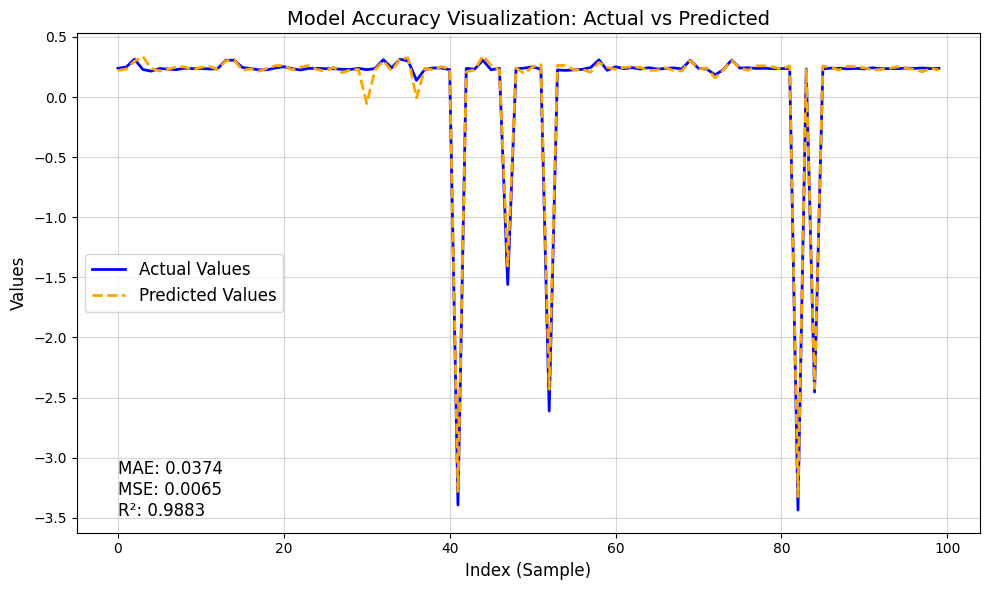

In [27]:
import matplotlib.pyplot as plt


# 使用真實值 (y_val_true) 與預測值 (y_val_pred)
plt.figure(figsize=(10, 6))

# 僅顯示前100個樣本
sample_range = 100
plt.plot(y_val_true[:sample_range], label="Actual Values", color='blue', linewidth=2)
plt.plot(y_val_pred[:sample_range], label="Predicted Values", color='orange', linestyle='--', linewidth=2)

plt.text(0, min(y_val_true), f"MAE: {mae:.4f}\nMSE: {mse:.4f}\nR²: {r2:.4f}", fontsize=12, color='black')

# 添加標題與標籤
plt.title("Model Accuracy Visualization: Actual vs Predicted", fontsize=14)
plt.xlabel("Index (Sample)", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)

# 顯示圖表
plt.tight_layout()
plt.show()

In [15]:
# import pandas as pd
# import numpy as np
# import torch
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import r2_score, mean_absolute_error
# from torch.utils.data import DataLoader, TensorDataset
# import torch.nn as nn
# from sklearn.metrics import mean_squared_error


# # 定義 LSTM 模型
# class LSTMModel(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, dropout, bidirectional=False):
#         super(LSTMModel, self).__init__()
#         self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout, bidirectional=bidirectional)
#         self.fc = nn.Sequential(
#             nn.LayerNorm(hidden_size * (2 if bidirectional else 1)),
#             nn.Dropout(0.4),
#             nn.Linear(hidden_size * (2 if bidirectional else 1), 1)
#         )

#     def forward(self, x):
#         out, _ = self.lstm(x)
#         out = out[:, -1, :]
#         return self.fc(out)

# # 加載完整模型
# model_path = "complete_trained_1225LSTM_model.pth"
# loaded_model = torch.load(model_path)
# loaded_model.eval()

# # 讀取測試數據 (以 Cell1 作為測試數據)
# test_data_path = "./BatteryData/Cell1_data.csv"
# test_data = pd.read_csv(test_data_path)

# # 特徵處理函數
# def calculate_rolling_std(data, window_size=20):
#     rolling_std = [np.std(data[i:i + window_size]) for i in range(len(data) - window_size + 1)]
#     return np.concatenate((np.zeros(window_size - 1), rolling_std))

# def rolling_mean_feature(data, window_size=5):
#     rolling_mean = [np.mean(data[i:i + window_size]) for i in range(len(data) - window_size + 1)]
#     return np.concatenate((np.zeros(window_size - 1), rolling_mean))

# # 計算滑動標準差和均值
# rolling_std = calculate_rolling_std(test_data['Coulombic_Efficiency (%)'].dropna().values)
# rolling_mean = rolling_mean_feature(test_data['Coulombic_Efficiency (%)'].dropna().values)
# test_data['Rolling_Std'] = rolling_std
# test_data['Rolling_Mean'] = rolling_mean

# # 選擇特徵並標準化
# selected_features = ['Cycle', 'OCVdc_q', 'OCVch_q', 'Coulombic_Efficiency (%)', 'Rolling_Std', 'Rolling_Mean']
# scaler = StandardScaler()
# test_data_array = scaler.fit_transform(test_data[selected_features])

# # 創建序列數據
# def create_sequences(data, sequence_length):
#     X, y = [], []
#     for i in range(len(data) - sequence_length + 1):
#         X.append(data[i:i + sequence_length, :-1])
#         y.append(data[i + sequence_length - 1, -1])
#     return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# sequence_length = 10
# X_test, y_test = create_sequences(test_data_array, sequence_length)

# # 測試數據加載器
# test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=64, shuffle=False)

# # 模型測試
# y_preds, y_trues = [], []

# with torch.no_grad():
#     for X_batch, y_batch in test_loader:
#         preds = loaded_model(X_batch)
#         y_preds.extend(preds.numpy())
#         y_trues.extend(y_batch.numpy())

# # 計算評估指標
# y_preds = np.array(y_preds).flatten()
# y_trues = np.array(y_trues).flatten()
# r2 = r2_score(y_trues, y_preds)
# mae = mean_absolute_error(y_trues, y_preds)
# rmse = np.sqrt(mean_squared_error(y_trues, y_preds))


# print(f"R² Score: {r2:.4f}")
# print(f"Mean Absolute Error (MAE): {mae:.4f}")
# print(f"Root Mean Square Error (RMSE): {rmse:.4f}")



R² Score: -16.1678
Mean Absolute Error (MAE): 0.0156
Root Mean Square Error (RMSE): 0.0195


C:\Users\User\AppData\Local\Temp\ipykernel_14840\3381614140.py:29: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.load(model_path)
